## Practical Work 4

For this practical work, we will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [482]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline
plt.style.use('seaborn-bright')

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [483]:
bias = 2
slop = -1
generated_input_data = np.linspace(0,20,50)
generated_output_data = slop*generated_input_data+bias
generated_input_data = generated_input_data[:,np.newaxis]
generated_output_data = generated_output_data[:,np.newaxis]


#### Plot your data points. 

Text(0, 0.5, 'Generated Output Data')

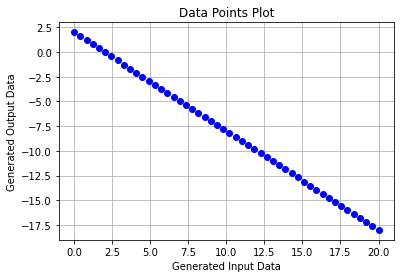

In [484]:
plt.title("Data Points Plot")
plt.plot(generated_input_data,generated_output_data,"bo",label="Original Data")
plt.grid()
plt.xlabel("Generated Input Data")
plt.ylabel("Generated Output Data")

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [485]:
def initialize_weights(col_dim,row_dim=1):
    return np.random.normal(size=(row_dim,col_dim))*0.01

In [486]:
def initialize_bias(weights_array):
    bias_value = np.random.normal()*0.01
    return np.insert(weights_array,0,bias_value)

In [487]:
def initialize_theta(features_number):
    weights = initialize_weights(features_number)
    return initialize_bias(weights).reshape([-1,1])

In [488]:
def predict(input_data,weights):
    return np.matmul(input_data,weights)

In [489]:
def calc_mean_square_error(sample_number,output,predicted):
    return (1/(2*sample_number))*np.sum(np.power((predicted-output),2))

In [490]:
def calc_gradient(number_of_samples,predicted,output,input):
    sum_term = np.sum((predicted-output)*input,axis=0)[:,np.newaxis]
    return (1/number_of_samples)*sum_term

In [491]:
def calc_new_weights(weights,d_theta,lr):
    return (weights - (lr*d_theta))

In [492]:
def split_data(training_data,real_output,samples_number,batches):
    samples_per_batch = samples_number//batches
    data_batches = {}
    batch_data ={}
    current_batch_start_index = 0
    current_batch_end_index = samples_per_batch
    for batch in range(1,batches+1):
        batch_data["training_batch_data"] = training_data[current_batch_start_index:current_batch_end_index]
        batch_data["real_output"] = real_output[current_batch_start_index:current_batch_end_index]
        data_batches[batch] = batch_data.copy()
        current_batch_start_index += samples_per_batch
        if batch == batches:
            current_batch_end_index = len(training_data)
        else:
            current_batch_end_index += samples_per_batch
    return data_batches

In [493]:
def prepare_theta_history(theta_matrix):
    theta_dict = {}
    for _,matrix in theta_matrix.items():
        for index,theta in enumerate(matrix):
            if "theta_"+str(index) in theta_dict.keys():
                theta_dict["theta_"+str(index)].append(theta)
            else:
                theta_dict["theta_"+str(index)] = [theta]
    return theta_dict

In [494]:
def prepare_input_data_for_training(data):
    if len(data.shape)<2:
        data = data[:,np.newaxis]
    return np.insert(data,0,1,axis=1)

In [495]:
def calc_adagrad_weights(weights,d_theta,lr,epsilon,adaptive_lr):
    adaptive_lr = (adaptive_lr+np.power(d_theta,2))
    effective_lr = lr/(np.sqrt(adaptive_lr)+epsilon)
    return (weights - (np.multiply(effective_lr,d_theta))),adaptive_lr

In [496]:
def solve_using_adagrade(raw_input_data,true_output,epochs,lr=0.0001,batches=1,epsilon=10**(-8)):
    cost_history = {}
    theta_history = {}
    prediction_history = {}
    adaptive_lr = 0
    epoch_index = 0
    training_data = prepare_input_data_for_training(raw_input_data)
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,true_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix,adaptive_lr = calc_adagrad_weights(theta_matrix,d_theta,lr,epsilon,adaptive_lr)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            prediction_history_output = predict(training_data,theta_matrix)
            prediction_history[batch+epoch_index] = prediction_history_output
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\n\tCost: {cost},\n\tGradient: {d_theta.flatten()}")
        print(f"\tR2 Score: {r2_score(true_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (np.abs(np.average(d_theta)) <= 0.0001 or np.abs(np.average(theta_history[batch+epoch_index-2]-theta_matrix)) <= 0.0001 or cost_history[batch+epoch_index-2]-cost <= 0.0001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    return {"weights_matrix":theta_matrix,"prediction_history":prediction_history,"epochs_history":cost_history,"theta_history":theta_history,"training_data":training_data,"true_output":true_output}

In [497]:
def plot_theta(fig,cost_history,theta_history):
    index = 513
    for key,value in theta_history.items():
        ax = fig.add_subplot(index)
        ax.plot(np.array(list(cost_history.values())).flatten(),value,"-r",label="predicted output",linewidth=5)
        ax.set_xlabel("loss",fontsize=14)
        ax.set_ylabel(key,fontsize=14)
        ax.set_title("All Fitted Lines Per Epoch")
        ax.grid()
        ax.set_title("Loss-"+key,fontsize=20)
        ax.legend()
        index += 1

In [498]:
def plot_best_fit_line(fig,raw_input_data,final_prediction,raw_output_data):
    final_prediction_key = list(final_prediction.keys())[-1]
    ax = fig.add_subplot(511)
    ax.plot(raw_input_data[:,1],raw_output_data,"bo",label="Original Data")
    ax.plot(raw_input_data[:,1],final_prediction[final_prediction_key].flatten(),"-r",label="Best Fit Line",linewidth=5)
    ax.set_xlabel("input",fontsize=14)
    ax.set_ylabel("output",fontsize=14)
    ax.set_title("Best Fit Line",fontsize=20)
    ax.grid()
    ax.legend()

In [499]:
def plot_loss_batches(fig,history):
    ax = fig.add_subplot(512)
    ax.plot(np.array(list(history.values())).flatten(),"-bo",label="true output",linewidth=5)
    ax.set_xlabel("Batches",fontsize=14)
    ax.set_ylabel("Cost",fontsize=14)
    ax.set_title("Loss-Batches",fontsize=20)
    ax.grid()
    ax.legend()

In [500]:
def plot_all_fitted_lines(fig,prediction_history,training_data,true_output):
    ax = fig.add_subplot(515)
    for batch,prediction_value in prediction_history.items():
        ax.plot(training_data,prediction_value,"-g",label="prediction line")
    ax.plot(training_data[:,1],true_output,"-bo",label="Original Data")
    ax.plot(training_data[:,1],prediction_history[list(prediction_history.keys())[-1]],"-r",label="Best Fit Line",linewidth =5)
    ax.set_xlabel("Batches",fontsize=14)
    ax.set_ylabel("Cost",fontsize=14)
    ax.set_title("All Fitted Lines",fontsize=20)
    ax.grid()

In [501]:
def plot_model_debug_graphs(model_results):
    fig = plt.figure(figsize=(10, 30), dpi=100)
    fig.tight_layout()
    plot_best_fit_line(fig,model_results["training_data"],model_results["prediction_history"],model_results["true_output"])
    plot_loss_batches(fig,model_results["epochs_history"])
    plot_theta(fig,model_results["epochs_history"],model_results["theta_history"])
    plot_all_fitted_lines(fig,model_results["prediction_history"],model_results["training_data"],model_results["true_output"])

Epoch:1 of 500, Batch: 1
	Cost: 49.2097206013063,
	Gradient: [  7.98443935 114.52541463]
	R2 Score: -0.1219840660923317
Epoch:2 of 500, Batch: 1
	Cost: 19.462988901601676,
	Gradient: [ 4.68443935 71.11725137]
	R2 Score: 0.4560804042511828
Epoch:3 of 500, Batch: 1
	Cost: 9.435339926254995,
	Gradient: [ 2.95001847 48.28235194]
	R2 Score: 0.7078398852521075
Epoch:4 of 500, Batch: 1
	Cost: 5.068083623177727,
	Gradient: [ 1.84739533 33.74671559]
	R2 Score: 0.8269827170216477
Epoch:5 of 500, Batch: 1
	Cost: 3.0013202149306024,
	Gradient: [ 1.10320143 23.91729936]
	R2 Score: 0.8855189793423957
Epoch:6 of 500, Batch: 1
	Cost: 1.9858952563053813,
	Gradient: [ 0.58854737 17.10060945]
	R2 Score: 0.9149314972759266
Epoch:7 of 500, Batch: 1
	Cost: 1.4756781084788253,
	Gradient: [ 0.22888577 12.31763746]
	R2 Score: 0.9300150445337745
Epoch:8 of 500, Batch: 1
	Cost: 1.2140247376794233,
	Gradient: [-0.02348231  8.9422854 ]
	R2 Score: 0.9379652014790777
Epoch:9 of 500, Batch: 1
	Cost: 1.076113851893550

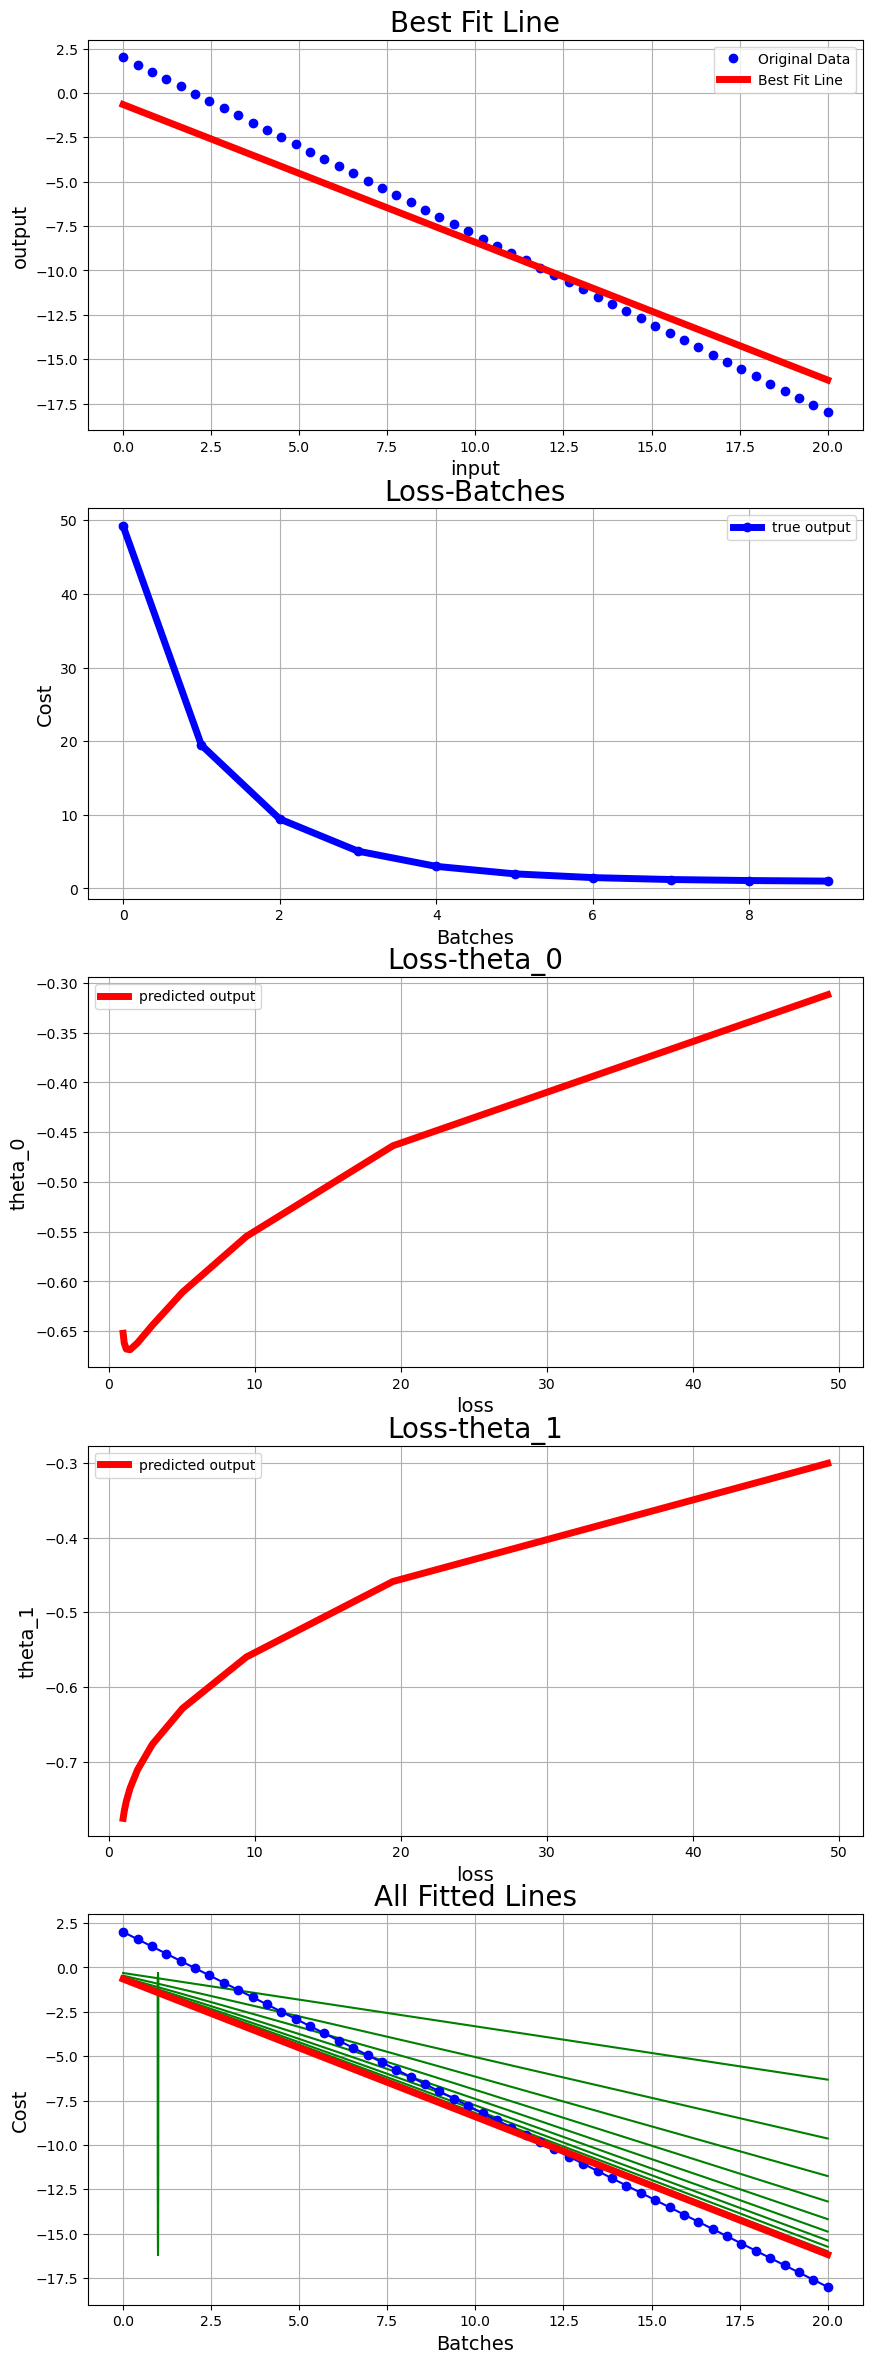

In [502]:
if __name__ == "__main__":
    raw_input_data = generated_input_data
    raw_output_data = generated_output_data
    model_results = solve_using_adagrade(raw_input_data,raw_output_data,500,0.3)
    print("Final \"Bias & Weights\": ",model_results["weights_matrix"].flatten())
    plot_model_debug_graphs(model_results)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [503]:
def calc_rmsprop_weights(weights,d_theta,lr,epsilon,beta,EWMA):
    EWMA = (np.multiply(beta,EWMA)+np.multiply((1-beta),np.power(d_theta,2)))
    effective_lr = lr/(np.sqrt(EWMA)+epsilon)
    return (weights - (np.multiply(effective_lr,d_theta))),EWMA

In [504]:
def solve_using_rmsprop(raw_input_data,true_output,epochs,lr=0.0001,beta=0.999,batches=1,epsilon=10**(-8)):
    cost_history = {}
    theta_history = {}
    prediction_history = {}
    EWMA = 0
    epoch_index = 0
    training_data = prepare_input_data_for_training(raw_input_data)
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,true_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix,EWMA = calc_rmsprop_weights(theta_matrix,d_theta,lr,epsilon,beta,EWMA)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            prediction_history_output = predict(training_data,theta_matrix)
            prediction_history[batch+epoch_index] = prediction_history_output
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\n\tCost: {cost},\n\tGradient: {d_theta.flatten()}")
        print(f"\tR2 Score: {r2_score(true_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (np.abs(np.average(d_theta)) <= 0.00001 or np.abs(np.average(theta_history[batch+epoch_index-2]-theta_matrix)) <= 0.00001 or cost_history[batch+epoch_index-2]-cost <= 0.00001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    return {"weights_matrix":theta_matrix,"prediction_history":prediction_history,"epochs_history":cost_history,"theta_history":theta_history,"training_data":training_data,"true_output":true_output}



Epoch:1 of 500, Batch: 1
	Cost: 47.13209839151685,
	Gradient: [  7.80389198 112.06108948]
	R2 Score: 0.019299180498767443
Epoch:2 of 500, Batch: 1
	Cost: 17.012157072980568,
	Gradient: [ 4.32538657 66.30486808]
	R2 Score: 0.5576045795887938
Epoch:3 of 500, Batch: 1
	Cost: 7.6742062724392905,
	Gradient: [ 2.561123   43.07337835]
	R2 Score: 0.7737208044547411
Epoch:4 of 500, Batch: 1
	Cost: 3.9252513512953078,
	Gradient: [ 1.4798575  28.81233763]
	R2 Score: 0.8676995723485292
Epoch:5 of 500, Batch: 1
	Cost: 2.2950074184438813,
	Gradient: [ 0.77905871 19.54595063]
	R2 Score: 0.9100652457492142
Epoch:6 of 500, Batch: 1
	Cost: 1.5600926757789366,
	Gradient: [ 0.31532539 13.39052465]
	R2 Score: 0.9296591719075095
Epoch:7 of 500, Batch: 1
	Cost: 1.220198038339122,
	Gradient: [6.15672407e-03 9.26295233e+00]
	R2 Score: 0.939017027584813
Epoch:8 of 500, Batch: 1
	Cost: 1.057867888834877,
	Gradient: [-0.20025685  6.48340562]
	R2 Score: 0.943732930976162
Epoch:9 of 500, Batch: 1
	Cost: 0.976061401

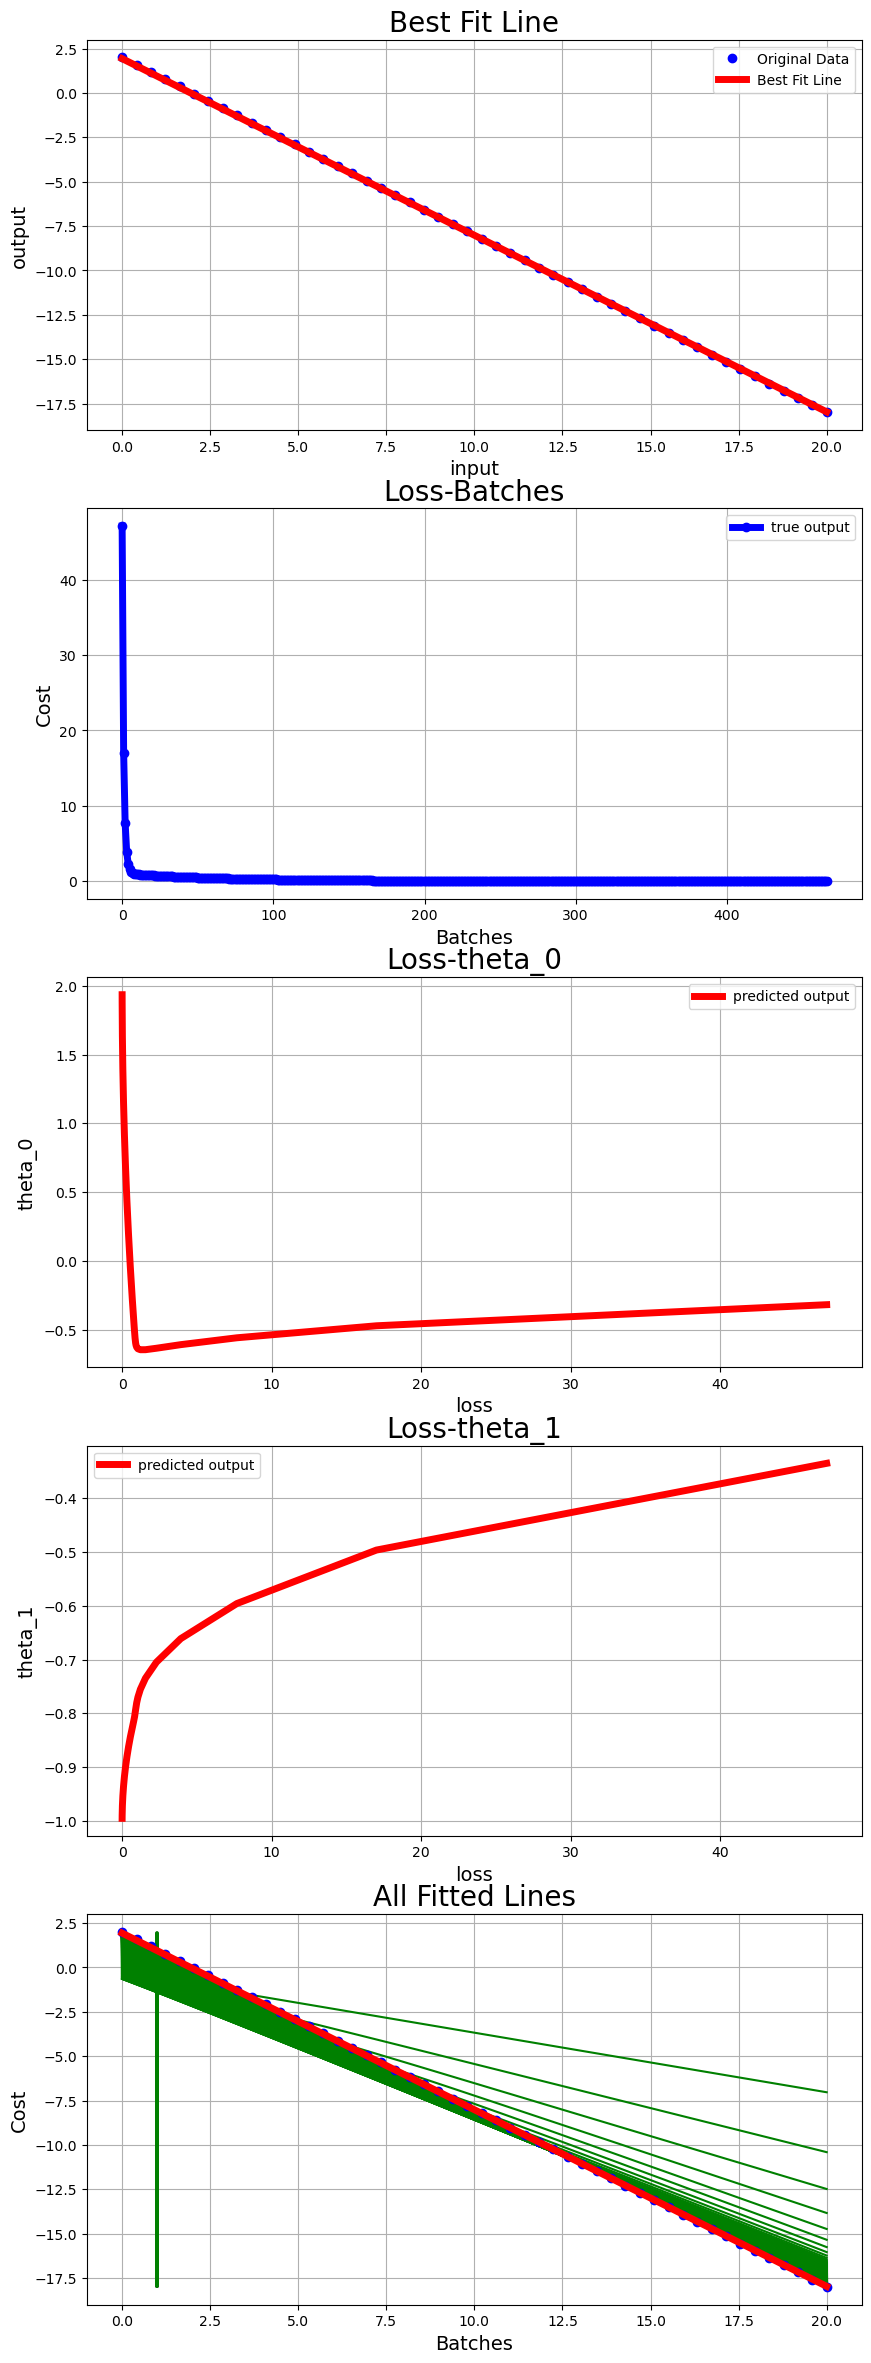

In [505]:
if __name__ == "__main__":
    raw_input_data = generated_input_data
    raw_output_data = generated_output_data
    model_results = solve_using_rmsprop(raw_input_data,raw_output_data,500,0.01,beta=0.999)
    print("Final \"Bias & Weights\": ",model_results["weights_matrix"].flatten())
    plot_model_debug_graphs(model_results)


## The comparison between Adagrad and RMSProp with the same hyper parameters

In [506]:
'''Adagrad'''
# if __name__ == "__main__":
#     raw_input_data = generated_input_data
#     raw_output_data = generated_output_data
#     model_results = solve_using_adagrade(raw_input_data,raw_output_data,500,0.001)
#     print("Final \"Bias & Weights\": ",model_results["weights_matrix"].flatten())
#     plot_model_debug_graphs(model_results)

'Adagrad'

In [507]:
'''RMSProp'''
# if __name__ == "__main__":
#     raw_input_data = generated_input_data
#     raw_output_data = generated_output_data
#     model_results = solve_using_rmsprop(raw_input_data,raw_output_data,500,0.001,beta=0.9999)
#     print("Final \"Bias & Weights\": ",model_results["weights_matrix"].flatten())
#     plot_model_debug_graphs(model_results)


'RMSProp'

## Comparison result
### *

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [508]:
def calc_adam_weights(weights,d_theta,lr,epsilon,beta1,beta2,EWMA,momentum,epoch):
    EWMA = (np.multiply(beta2,EWMA)+np.multiply((1-beta2),np.power(d_theta,2)))
    EWMA = EWMA/(1-np.power(beta2,epoch))
    momentum = (np.multiply(beta1,momentum)+np.multiply((1-beta1),d_theta))
    momentum = momentum/(1-np.power(beta1,epoch))
    effective_lr = lr/(np.sqrt(EWMA)+epsilon)
    return (weights - (np.multiply(effective_lr,momentum))),EWMA,momentum

In [509]:
def solve_using_adam(raw_input_data,true_output,epochs,lr=0.0001,batches=1,beta1=0.9,beta2=0.999,epsilon=10**(-8)):
    cost_history = {}
    theta_history = {}
    prediction_history = {}
    EWMA = 0
    momentum = 0
    epoch_index = 0
    training_data = prepare_input_data_for_training(raw_input_data)
    samples_number = training_data.shape[0]
    features_number = training_data.shape[1] - 1
    theta_matrix = initialize_theta(features_number)
    for epoch in range(1,epochs+1):
        for batch in range(1,batches+1):
            data_batches = split_data(training_data,true_output,samples_number,batches)
            training_data_batch = data_batches[batch]["training_batch_data"]
            real_output_data_batch = data_batches[batch]["real_output"]
            batch_samples_number = training_data_batch.shape[0]
            predicted_output = predict(training_data,theta_matrix)
            cost = calc_mean_square_error(batch_samples_number,real_output_data_batch,predicted_output)
            d_theta = calc_gradient(batch_samples_number,predicted_output,real_output_data_batch,training_data_batch)
            theta_matrix,EWMA,momentum = calc_adam_weights(theta_matrix,d_theta,lr,epsilon,beta1,beta2,EWMA,momentum,epoch)
            cost_history[batch+epoch_index] = cost
            theta_history[batch+epoch_index] = theta_matrix
            prediction_history_output = predict(training_data,theta_matrix)
            prediction_history[batch+epoch_index] = prediction_history_output
            print(f"Epoch:{epoch} of {epochs}, Batch: {batch}\n\tCost: {cost},\n\tGradient: {d_theta.flatten()}")
        print(f"\tR2 Score: {r2_score(true_output,predict(training_data,theta_matrix))}")
        if epoch > 1 and (np.abs(np.average(d_theta)) <= 0.0001 or np.abs(np.average(theta_history[batch+epoch_index-2]-theta_matrix)) <= 0.0001 or np.abs(cost_history[batch+epoch_index-2]-cost) <= 0.0001):
            break
        epoch_index += (batches+1)
    theta_history = prepare_theta_history(theta_history)
    return {"weights_matrix":theta_matrix,"prediction_history":prediction_history,"epochs_history":cost_history,"theta_history":theta_history,"training_data":training_data,"true_output":true_output}

Epoch:1 of 500, Batch: 1
	Cost: 47.24503641176377,
	Gradient: [  7.80732135 112.18314098]
	R2 Score: 0.6130994619393068
Epoch:2 of 500, Batch: 1
	Cost: 6.711539945950802,
	Gradient: [ 2.30732135 39.83620221]
	R2 Score: 0.783789017134938
Epoch:3 of 500, Batch: 1
	Cost: 3.750598682353118,
	Gradient: [ -2.73510261 -26.50951615]
	R2 Score: -0.2886699455907038
Epoch:4 of 500, Batch: 1
	Cost: 22.35447864800201,
	Gradient: [ -6.42851117 -75.11914956]
	R2 Score: -1.5824790820612842
Epoch:5 of 500, Batch: 1
	Cost: 44.798106525552896,
	Gradient: [  -8.91672756 -107.87551377]
	R2 Score: -2.6651673884354588
Epoch:6 of 500, Batch: 1
	Cost: 63.57943428918654,
	Gradient: [ -10.5270548  -129.08015669]
	R2 Score: -3.45081026633407
Epoch:7 of 500, Batch: 1
	Cost: 77.2079331915094,
	Gradient: [ -11.54705199 -142.51488121]
	R2 Score: -3.9818740674027877
Epoch:8 of 500, Batch: 1
	Cost: 86.42026443453817,
	Gradient: [ -12.18529335 -150.92377001]
	R2 Score: -4.326957697868159
Epoch:9 of 500, Batch: 1
	Cost: 

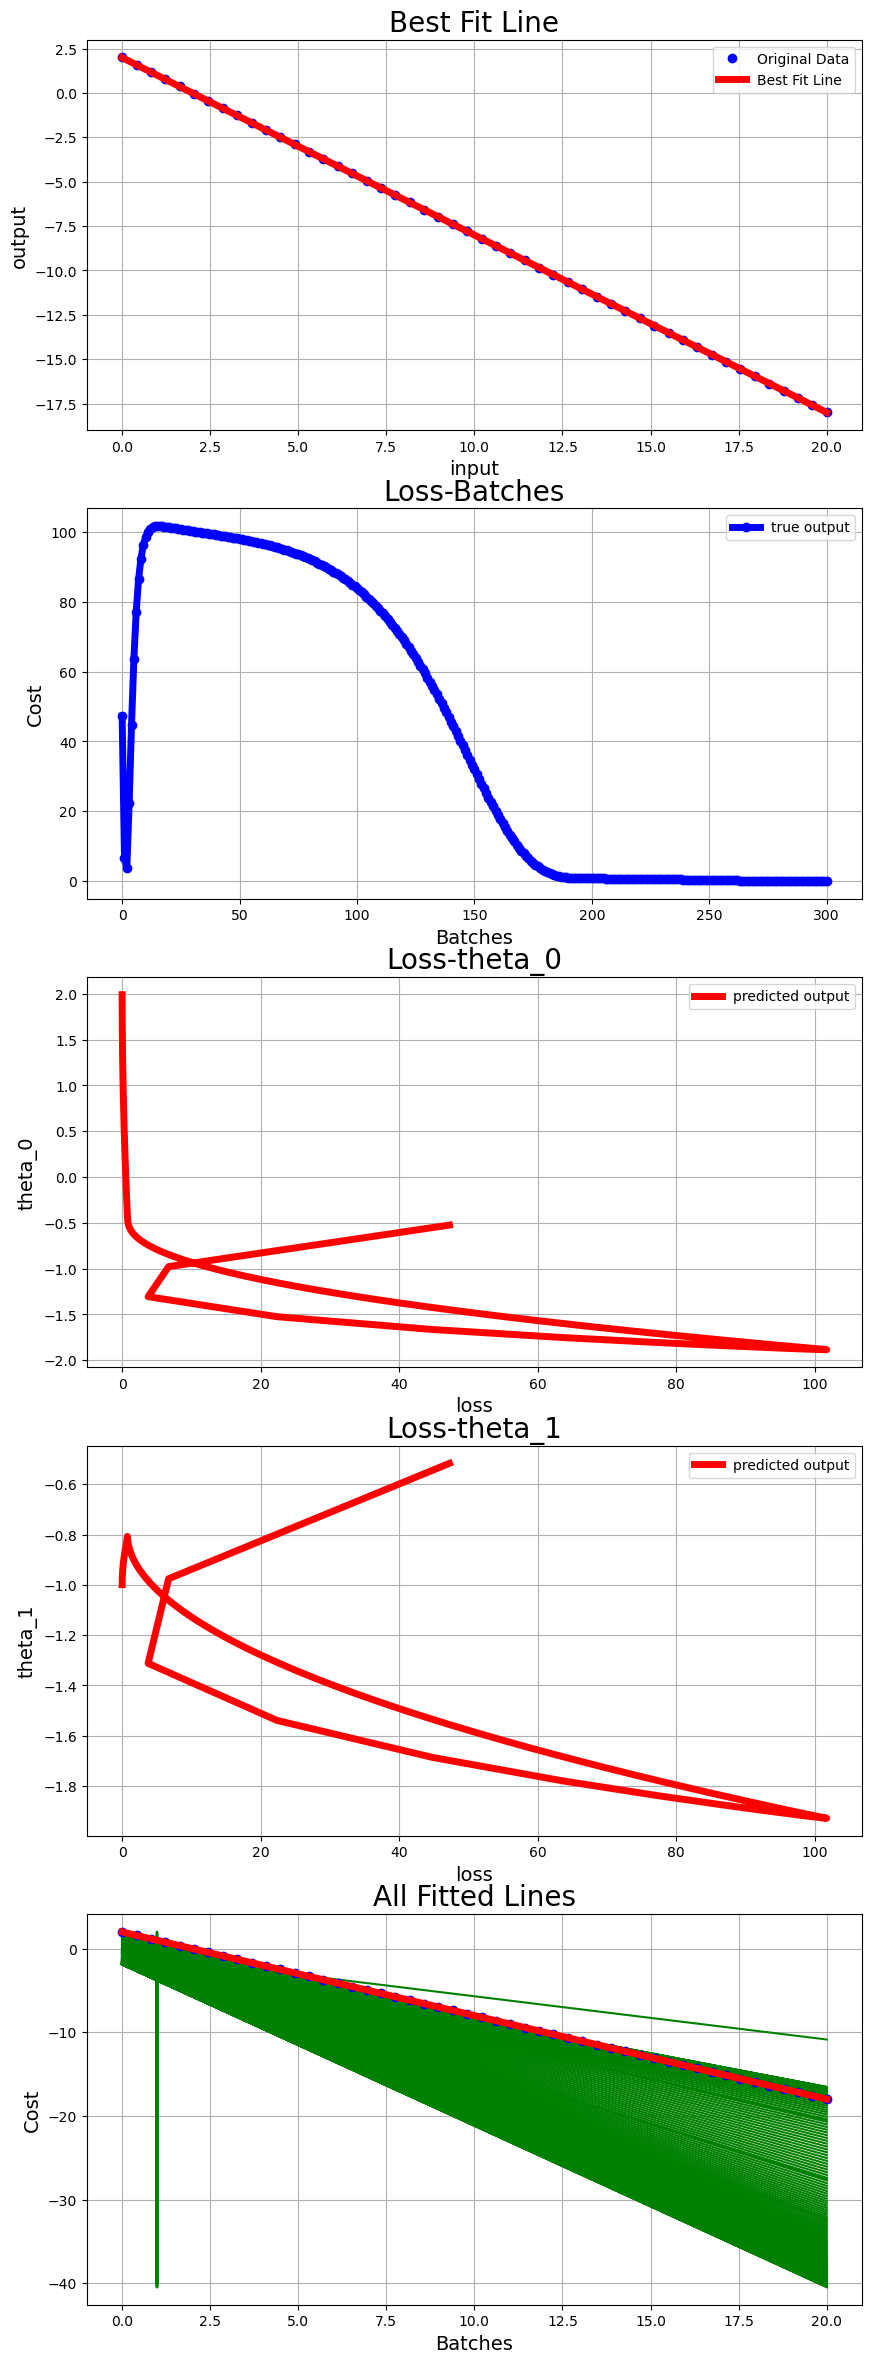

In [510]:
if __name__ == "__main__":
    raw_input_data = generated_input_data
    raw_output_data = generated_output_data
    model_results = solve_using_adam(raw_input_data,raw_output_data,500,lr=0.5,beta2=0.93,beta1=0.8)
    print("Final \"Bias & Weights\": ",model_results["weights_matrix"].flatten())
    plot_model_debug_graphs(model_results)


## The comparison between Adam and RMSProp with the same hyper parameters

In [511]:
'''RMSProp'''
# if __name__ == "__main__":
#     raw_input_data = generated_input_data
#     raw_output_data = generated_output_data
#     model_results = solve_using_rmsprop(raw_input_data,raw_output_data,500,0.001,beta=0.9999)
#     print("Final \"Bias & Weights\": ",model_results["weights_matrix"].flatten())
#     plot_model_debug_graphs(model_results)

'RMSProp'

In [512]:
'''Adam'''
# if __name__ == "__main__":
#     raw_input_data = generated_input_data
#     raw_output_data = generated_output_data
#     model_results = solve_using_adam(raw_input_data,raw_output_data,500,0.001,beta2=0.9999,beta1=0.9)
#     print("Final \"Bias & Weights\": ",model_results["weights_matrix"].flatten())
#     plot_model_debug_graphs(model_results)


'Adam'

## Congratulations 
![image.png](attachment:image.png)


